# 手寫英文字母辨識

## 步驟1：載入 EMNIST 資料
#### 來源：[The EMNIST Dataset](https://www.nist.gov/itl/products-and-services/emnist-dataset)

In [1]:
import tensorflow as tf

In [2]:
!pip install emnist -U

^C


In [3]:
# 遇到錯誤 BadZipFile: File is not a zip file 的解決方式：
# 把老師給的 emnist.zip 放在 C:\Users\<user name>\.cache\emnist資料夾內
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
# 載入 EMNIST 資料
from emnist import extract_training_samples
from emnist import extract_test_samples

(x_train, y_train),(x_test, y_test) = extract_training_samples('letters'), extract_test_samples('letters')

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(124800, 28, 28) (124800,) (20800, 28, 28) (20800,)


In [5]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([23,  7, 16, 15, 23, 17, 13, 11, 22, 24], dtype=uint8)

In [6]:
import numpy as np

np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [7]:
y_train = y_train - 1
y_test = y_test - 1

In [8]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=uint8)

In [9]:
class_names = [chr(ord('A')+i) for i in range(26)]
''.join(class_names)

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [10]:
import numpy as np

np.array(class_names)[y_train[:10]]

array(['W', 'G', 'P', 'O', 'W', 'Q', 'M', 'K', 'V', 'X'], dtype='<U1')

In [11]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  20, 109, 114,  45,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 114, 245, 253, 214,   5,   0,   0,   0,   0,   0,
         20, 100,  33,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 125, 249, 254, 233,  22,   0,   0,   0,   0,  10,
        123, 238, 163,  33,   0,   0,   0,   0,   2,   4,   4,   0,   0,
          0,   0],
       [  0,   0,   0,  82, 233, 254, 251,  82,   2,   0,   0,   3,  79,
        220, 254, 244, 126,   0,   0,   0,   3,  77, 125, 113,   8,   0,
          0,   0],
       [  

In [12]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000110000000000000000000000',
 '0001111000000000000000000000',
 '0001111100000111100000000000',
 '0001111100001111100001110000',
 '0001111110011111100011111000',
 '0001111110011111110111111100',
 '0001111110111111111111111100',
 '0001111110111111111111111000',
 '0001111111111111111111110000',
 '0011111111111111111111110000',
 '0001111111111111111111100000',
 '0001111111111111111111000000',
 '0001111111111111111110000000',
 '0001111111111111111110000000',
 '0001111111111111111110000000',
 '0001111111110111111110000000',
 '0001111111100111111100000000',
 '0001111111100111111100000000',
 '0001111111000111111100000000',
 '0001111111000111111000000000',
 '0001111111000111111000000000',
 '0001111110000011111000000000',
 '0001111110000011110000000000',
 '0001111110000001100000000000',
 '0001111100000000000000000000',
 '0000111000000000000000000000',
 '0000000000000000000000000000']

In [13]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000011111000000',
 '0000000000000111111111111000',
 '0000000000111111111111111100',
 '0000000111111111111111111100',
 '0000000111111111111111111100',
 '0000001111111111111111111100',
 '0000011111111111111111110000',
 '0000111111111111111111100000',
 '0000111111111111111110000000',
 '0000111111111111111110000000',
 '0001111111111110011110000000',
 '0011111111111111111111110000',
 '0011111111111111111111111000',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111000',
 '0011111111111111111111100000',
 '0011111111111111111111000000',
 '0011111111111111111111100000',
 '0011111111111111111111100000',
 '0000111111111111111111000000',
 '0000000111111111111000000000',
 '0000000001111111110000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

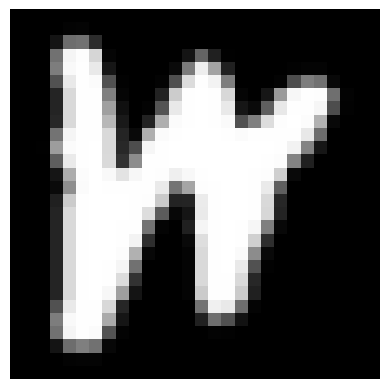

In [14]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

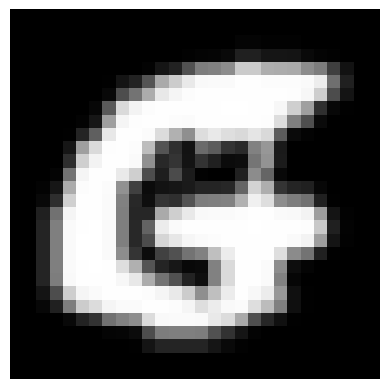

In [15]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

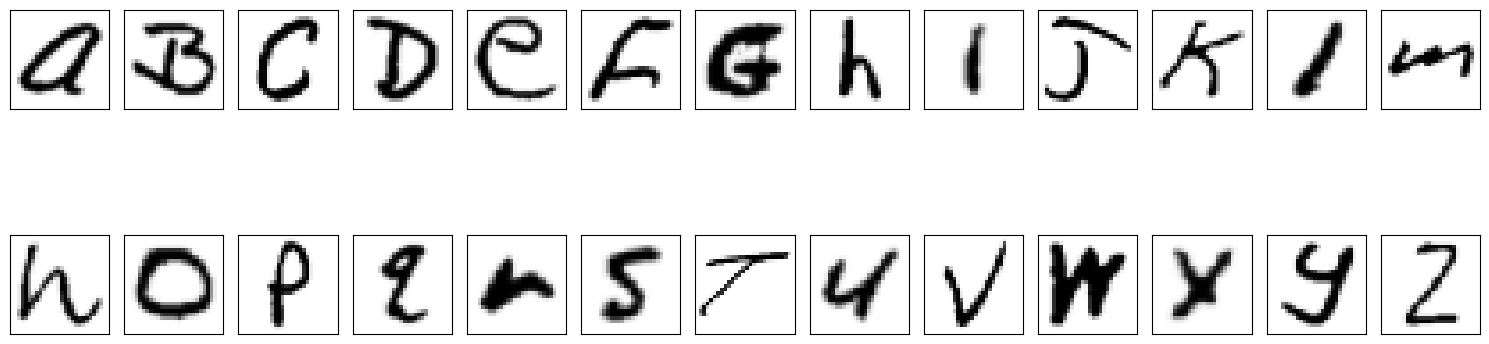

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=13, sharex=True, sharey=True)
fig.set_figheight(6)
fig.set_figwidth(15)
ax = ax.flatten()
for i in range(26):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

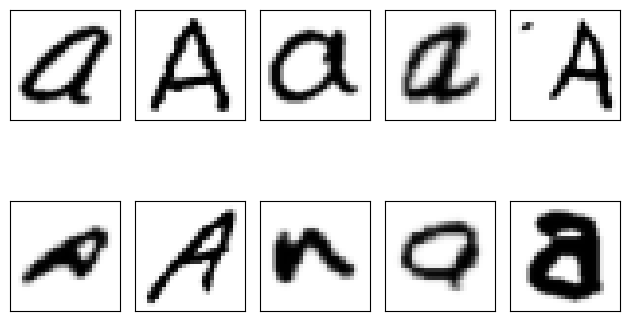

In [17]:
no=0
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [45]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843137, 0.42745098,
        0.44705882, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [46]:
# 建立模型
from tensorflow.keras import layers
import numpy as np

input_shape=(28, 28, 1)
# 增加一維在最後面
x_train_norm = np.expand_dims(x_train_norm, -1)
x_test_norm = np.expand_dims(x_test_norm, -1)

# CNN 模型
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(26, activation="softmax"),
    ]
)

In [47]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [48]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2, batch_size=1000)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - accuracy: 0.3805 - loss: 2.2110 - val_accuracy: 0.7881 - val_loss: 0.6983
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.7728 - loss: 0.7375 - val_accuracy: 0.8536 - val_loss: 0.4852
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.8251 - loss: 0.5577 - val_accuracy: 0.8766 - val_loss: 0.4080
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.8516 - loss: 0.4801 - val_accuracy: 0.8891 - val_loss: 0.3670
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.8642 - loss: 0.4327 - val_accuracy: 0.8931 - val_loss: 0.3457
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.8742 - loss: 0.4050 - val_accuracy: 0.9004 - val_loss: 0.3243
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.8826 - loss: 0.3757 - val_accuracy: 0.9056 - val_loss: 0.3082
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.8838 - loss: 0

In [22]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

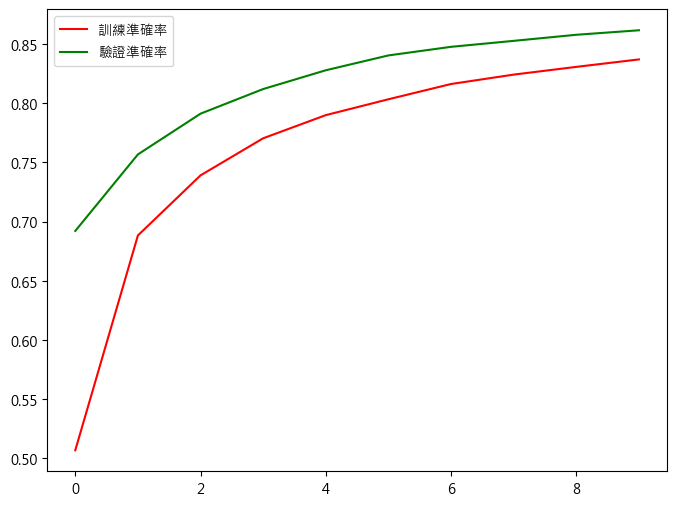

In [23]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

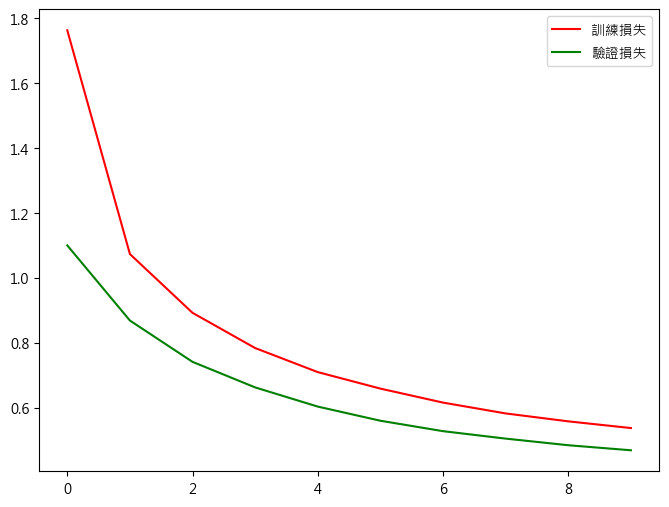

In [24]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [25]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.4629
compile_metrics: 0.8618


In [26]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', [class_names[i] for i in y_test[0:20]])
print('prediction:', [class_names[i] for i in predictions[0:20]])

650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
actual    : ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
prediction: ['A', 'A', 'A', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A']


In [27]:
random_list = np.random.randint(0, x_test_norm.shape[0], 20)
# 比對
print('actual    :', [class_names[i] for i in y_test[random_list]])
print('prediction:', [class_names[i] for i in predictions[random_list]])

actual    : ['F', 'S', 'A', 'H', 'T', 'F', 'V', 'F', 'B', 'G', 'M', 'S', 'N', 'T', 'U', 'B', 'G', 'Y', 'Q', 'Y']
prediction: ['F', 'S', 'A', 'H', 'T', 'F', 'V', 'F', 'B', 'G', 'P', 'S', 'N', 'T', 'V', 'B', 'Q', 'Y', 'A', 'Y']


In [28]:
# 顯示第 4 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[3:4], verbose=0)
print(f'0~9預測機率: {np.around(predictions, 2)}')

0~9預測機率: [[0.19 0.   0.   0.02 0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
  0.01 0.   0.26 0.   0.   0.   0.5  0.   0.   0.   0.   0.  ]]


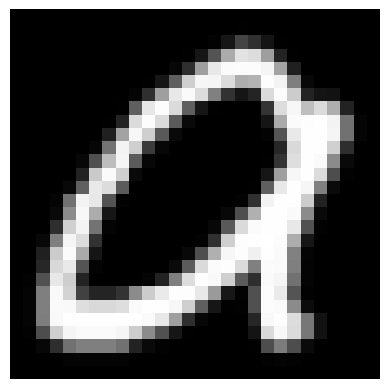

In [29]:
# 顯示第 4 筆圖像
X2 = x_test[3,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

In [30]:
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
predictions = np.argmax(model.predict(x_test_norm, verbose=0), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
實際值,,,,,,,,,,,,,,,,,,,,,,,,,,
0,667,0,6,14,13,3,10,9,0,1,3,0,3,10,11,6,21,3,1,1,7,0,2,2,0,7
1,11,714,1,6,5,0,10,23,2,1,1,5,0,2,5,1,2,1,1,0,1,0,0,0,0,8
2,5,1,728,3,33,1,2,0,1,0,3,2,0,0,5,3,1,6,0,2,2,0,1,1,0,0
3,13,22,1,659,0,0,0,5,1,9,6,1,1,3,48,6,7,0,1,2,8,2,3,0,2,0
4,8,5,25,1,723,1,1,0,1,0,0,2,1,1,4,3,3,11,3,3,1,0,0,1,1,1
5,1,1,1,2,4,697,2,2,5,1,1,2,0,0,0,34,6,16,3,21,0,0,0,1,0,0
6,25,22,7,2,9,15,546,2,0,6,0,1,0,2,1,4,128,1,17,0,3,0,2,0,6,1
7,8,14,0,7,1,2,0,660,4,2,22,13,7,34,0,0,0,3,0,2,11,0,3,4,3,0
8,0,2,1,2,1,4,1,2,603,12,0,144,0,0,0,0,0,5,4,4,2,1,0,3,0,9


## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [49]:
# 模型存檔
model.save('model.keras')

# 模型載入
import keras
model = keras.models.load_model('model.keras')

In [36]:
keras.__version__

'3.1.0.dev2024031603'

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,670 (811.21 KB)

 Trainable params: 103,834 (405.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,836 (405.61 KB)

## 步驟10：新資料預測

In [43]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myData/A.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
print(predictions)
print(class_names[predictions[0]])

(280, 280)
[12]
M


In [97]:
# 讀取影像並轉為單色
predict_list=''
for i in range(26):
    uploaded_file = f'./myData/{chr(ord("A")+i)}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
    predict_list += class_names[predictions[0]]
print('actual    :', ''.join([class_names[i] for i in range(26)]))
print('prediction:', predict_list)

actual    : ABCDEFGHIJKLMNOPQRSTUVWXYZ
prediction: AZCTEFQHIJXLMNOPQFSTUVWXYZ
